In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image
from glob import glob
from functools import partial
from tqdm import tqdm
from pathlib import Path
from matplotlib import rc

In [2]:
def quantify_cells(df, green_mip, red_mip, r):
    func = partial(quantify_cell, green_mip=green_mip, red_mip=red_mip, r=r)
    results = df.apply(func, axis=1).tolist()
    green_intens = [result[0] for result in results]
    red_intens = [result[1] for result in results]
    df['dpt_gfp'] = green_intens
    df['mem_mch'] = red_intens
    
    return df

def quantify_cell(row, green_mip, red_mip, r):
    y = int(row.y)
    x = int(row.x)
    green_mask = disk(x, y, r, green_mip.shape)
    green_inten = np.sum(green_mask * green_mip) / np.sum(green_mask)
    
    red_mask = disk(x, y, r, red_mip.shape)
    red_inten = np.sum(red_mask * red_mip) / np.sum(red_mask)
    
    return green_inten, red_inten
    

def disk(x, y, r, shape):
    ygrid, xgrid = np.indices(shape)
    distances = np.sqrt((x - xgrid) ** 2 + (y - ygrid) ** 2)
    disk = distances <= r
    
    return disk


def quantify_experiments(experiment_paths, r):
    counter = 0
    full_df = pd.DataFrame(columns=['experiment_id', 'y', 'x', 'dpt_gfp', 'mem_mch'])
    for experiment_path in experiment_paths:
        larvae_dirs = glob(experiment_path + '/larvae*')
        for larvae_dir in larvae_dirs:
            print(larvae_dir)
            if Path(larvae_dir + '/manual_df.pkl').is_file():
                df = pd.read_pickle(larvae_dir + '/manual_df.pkl')
                green_mip = np.array(Image.open(larvae_dir + '/mips/mip_green_0.tif'))
                red_mip = np.array(Image.open(larvae_dir + '/mips/mip_red_0.tif'))
                result = quantify_cells(df, green_mip, red_mip, r=r)
                df = quantify_cells(df, green_mip, red_mip, r=r)
                df['experiment_id'] = counter
                full_df = pd.concat((full_df, df), axis=0, ignore_index=True)
                counter += 1
    
    return full_df
            

    
    

In [3]:
eL3_24_experiment_paths = [ r'/media/brandon/Data1/Brandon/fly_immune/Lightsheet_Z1/2023_02_07_dpt-gfp_r4-gal4_uas-mcd8-mcherry_ecoli-hs-dtom_earlyL3_24hrs',
    r'/media/brandon/Data1/Brandon/fly_immune/Lightsheet_Z1/2023_02_10_dpt-gfp_4r-gal4_uas-mcd8-mcherry_ecoli-hs-dtom_24hrs']

eL3_ctl_experiment_paths = [r'/media/brandon/Data1/Brandon/fly_immune/Lightsheet_Z1/2023_02_21-dpt-gfp_r4-gal4_uas-mcd8-mcherry_ctl-inj_earlyL3_24hrs']

mL3_24_experiment_paths = [r'/media/brandon/Data1/Brandon/fly_immune/Lightsheet_Z1/2023_02_16_dpt-gfp_4r-gal4_uas-mcd8-mcherry_ecoli-hs-dtom_24hrs_mid']

# I screwed up the path names: these 2 should be flipped
mL3_24_noinj_experiment_paths = [r'/media/brandon/Data2/Brandon/fly_immune/Lightsheet_Z1/2023_03_01-dpt-gfp_r4-gal4_uas-mcd8-mcherry_ecoli-hs-dtom_earlyL3_24hrs']

mod_eL3_24_experiment_paths = [r'/media/brandon/Data1/Brandon/fly_immune/Lightsheet_Z1/2023_02_24-dpt-gfp_r4-gal4_uas-mcd8-mcherry_noInjCtl_lateL3']

In [4]:
# radius of disk to quantify gfp inten
r = 20

In [7]:
# # assemble eL3_24 data
# experiment_paths = eL3_24_experiment_paths
# df_eL3_24 = quantify_experiments(experiment_paths, r=r)
            
          
# # assemble eL3_ctl data
# experiment_paths = eL3_ctl_experiment_paths
# df_eL3_ctl = quantify_experiments(experiment_paths, r=r)

# # assemble mL3_24 data
# experiment_paths = mL3_24_experiment_paths
# df_mL3_24 = quantify_experiments(experiment_paths, r=r)

# # assemble mL3_24_noinj data
# experiment_paths = mL3_24_noinj_experiment_paths
# df_mL3_24_noinj = quantify_experiments(experiment_paths, r=r)
            
        
# assemble mod_eL3_24_noinj data
experiment_paths = mod_eL3_24_experiment_paths
df_mod_eL3_24 = quantify_experiments(experiment_paths, r=r)

/media/brandon/Data1/Brandon/fly_immune/Lightsheet_Z1/2023_02_24-dpt-gfp_r4-gal4_uas-mcd8-mcherry_noInjCtl_lateL3/larvae_1
/media/brandon/Data1/Brandon/fly_immune/Lightsheet_Z1/2023_02_24-dpt-gfp_r4-gal4_uas-mcd8-mcherry_noInjCtl_lateL3/larvae_3
/media/brandon/Data1/Brandon/fly_immune/Lightsheet_Z1/2023_02_24-dpt-gfp_r4-gal4_uas-mcd8-mcherry_noInjCtl_lateL3/larvae_2


In [14]:
df_eL3_24.to_pickle(r'/media/brandon/Data1/Brandon/fly_immune/diptericin_paper/manual_analysis/df_el3_24.pkl')
df_eL3_ctl.to_pickle(r'/media/brandon/Data1/Brandon/fly_immune/diptericin_paper/manual_analysis/df_eL3_ctl.pkl')
df_mL3_24.to_pickle(r'/media/brandon/Data1/Brandon/fly_immune/diptericin_paper/manual_analysis/df_mL3_24.pkl')
df_mL3_24_noinj.to_pickle(r'/media/brandon/Data1/Brandon/fly_immune/diptericin_paper/manual_analysis/df_mod_eL3_24.pkl')

In [16]:
tmp_df = df_mL3_24_noinj.copy()
df_mL3_24_noinj = df_mod_eL3_24.copy()
df_mod_eL3_24 = tmp_df.copy()

In [15]:
df_mod_eL3_24.to_pickle(r'/media/brandon/Data1/Brandon/fly_immune/diptericin_paper/manual_analysis/df_mL3_24_noinj.pkl')

In [408]:
%matplotlib qt

In [24]:
rc('axes', linewidth=2)

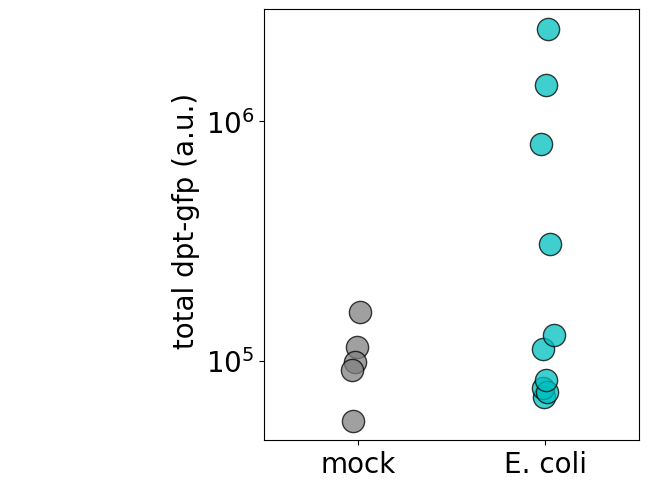

In [9]:
# scatter plot of total intensities
plt.figure()
fontsize = 20

ctl_tot_intens = df_eL3_ctl.groupby(by='experiment_id').sum().dpt_gfp.values
eL3_24_tot_intens = df_eL3_24.groupby(by='experiment_id').sum().dpt_gfp.values
sigma_x = 0.02
plt.plot(np.ones(len(ctl_tot_intens)) + sigma_x * np.random.normal(size=len(ctl_tot_intens)), ctl_tot_intens, 'ko',
        markerfacecolor=[0.5, 0.5, 0.5], markersize=16, alpha=0.75)
plt.plot(1 + np.ones(len(eL3_24_tot_intens)) + sigma_x * np.random.normal(size=len(eL3_24_tot_intens)), 
         eL3_24_tot_intens, 'ko', markerfacecolor='c', markersize=16, alpha=0.75)

plt.xticks([1, 2], labels=['mock', 'E. coli'], fontsize=fontsize)
plt.xlim([0.5, 2.5])
plt.ylabel('\n \n \n \n \n total dpt-gfp (a.u.)', fontsize=fontsize)
plt.yscale('log')
plt.minorticks_off()
ax = plt.gca()
fontweight = 'bold'
fontproperties = {'family':'sans-serif','sans-serif':['Helvetica'],'weight' : fontweight, 'size' : fontsize}
ax.xaxis.set_tick_params(labelsize=20)
ax.yaxis.set_tick_params(labelsize=20)
for tick in ax.xaxis.get_major_ticks():
    tick.label1.set_fontsize(fontsize)
for tick in ax.yaxis.get_major_ticks():
    tick.label1.set_fontsize(fontsize)
    
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=1.0)
#plt.savefig(r'/media/brandon/Data1/Brandon/fly_immune/diptericin_paper/manual_analysis/tot_inten_dot_plot.pdf')


In [222]:
# add manual background offsets

# eL3-24
df = df_eL3_24
larvae_number = [1, 5, 3, 2, 1, 5, 3, 2, 6, 4]
ids = np.array([1, 4, 3, 2, 5, 9, 7, 6, 10, 8]) - 1
shifts = [1000, 400, 300, 730, 300, 890, 300, 300, 350, 300]
df['bkg'] = 0
for i in range(len(df)):
    this_id = ids[df.iloc[i].experiment_id]
    df.at[df.index[i], 'bkg'] = shifts[this_id]
    
# mod_eL3-24
df = df_mod_eL3_24
ids = np.array([4, 1, 5, 7, 2, 3, 6]) - 1
shifts = [700, 1300, 430, 450, 580, 1200, 580]
df['bkg'] = 0
for i in range(len(df)):
    this_id = ids[df.iloc[i].experiment_id]
    df.at[df.index[i], 'bkg'] = shifts[this_id]

# mL3-24
df = df_mL3_24
ids = np.array([1, 5, 3, 2, 6, 4]) - 1
shifts = [1900, 2100, 6000, 3400, 4000, 2300]
df['bkg'] = 0
for i in range(len(df)):
    this_id = ids[df.iloc[i].experiment_id]
    df.at[df.index[i], 'bkg'] = shifts[this_id]

In [205]:
df_mod_eL3_24

,experiment_id,y,x,dpt_gfp,mem_mch,bkg
0,0,1342.881222,706.17441,3060.60541,8016.826571,450
1,0,1459.702117,720.249217,3392.995227,10530.707239,450
2,0,1393.550526,758.251195,2345.4821,10741.83214,450
3,0,1231.690249,749.806311,2214.930788,5803.951472,450
4,0,1265.469785,897.591781,2991.099443,7531.869531,450
...,...,...,...,...,...,...
1723,6,3796.321976,2006.676308,14208.482896,2981.874304,1200
1724,6,3609.466474,1850.729235,16938.789976,5657.010342,1200
1725,6,2780.55861,2041.799522,18261.720764,8540.368337,1200
1726,6,2715.931895,1957.503807,18804.806683,7353.918854,1200


In [168]:
df['bkg'] = 0
for i in range(len(df)):
    this_id = ids[ids == df.iloc[i].experiment_id][0]
    df.at[df.index[i], 'bkg'] = shifts[this_id]

In [220]:
path =r'/media/brandon/Data1/Brandon/fly_immune/Lightsheet_Z1/2023_02_07_dpt-gfp_r4-gal4_uas-mcd8-mcherry_ecoli-hs-dtom_earlyL3_24hrs'
files = glob(path + '/larvae*')
files

['/media/brandon/Data1/Brandon/fly_immune/Lightsheet_Z1/2023_02_07_dpt-gfp_r4-gal4_uas-mcd8-mcherry_ecoli-hs-dtom_earlyL3_24hrs/larvae_1',
 '/media/brandon/Data1/Brandon/fly_immune/Lightsheet_Z1/2023_02_07_dpt-gfp_r4-gal4_uas-mcd8-mcherry_ecoli-hs-dtom_earlyL3_24hrs/larvae_5',
 '/media/brandon/Data1/Brandon/fly_immune/Lightsheet_Z1/2023_02_07_dpt-gfp_r4-gal4_uas-mcd8-mcherry_ecoli-hs-dtom_earlyL3_24hrs/larvae_3',
 '/media/brandon/Data1/Brandon/fly_immune/Lightsheet_Z1/2023_02_07_dpt-gfp_r4-gal4_uas-mcd8-mcherry_ecoli-hs-dtom_earlyL3_24hrs/larvae_2',
 '/media/brandon/Data1/Brandon/fly_immune/Lightsheet_Z1/2023_02_07_dpt-gfp_r4-gal4_uas-mcd8-mcherry_ecoli-hs-dtom_earlyL3_24hrs/larvae_4']

In [221]:
np.min(df[df.experiment_id==0].dpt_gfp)

1145.0739856801908

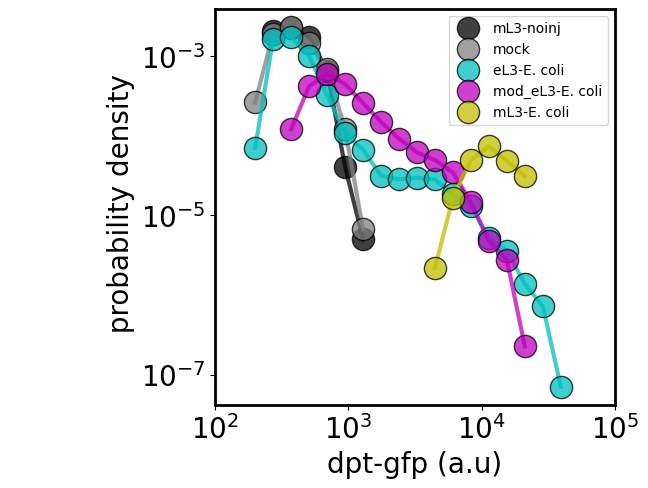

In [214]:
# probability densities of all cell levels

plt.figure()
num_bins = 20
bins = np.logspace(2.3, 5, num_bins+1)

# ml3_24_no_inj
df = df_mL3_24_noinj
intens = df.dpt_gfp
counts, _bins = np.histogram(intens, bins)
bin_widths = np.diff(bins)
bins = bins[:-1]
prob_dens = counts / np.sum(counts) / bin_widths

plt.plot(bins[prob_dens > 0], prob_dens[prob_dens > 0], 'k-', linewidth=3, label='_no_label_', alpha=0.75)
plt.plot(bins[prob_dens > 0], prob_dens[prob_dens > 0], 'ko', markersize=16, markerfacecolor='k', label='mL3-noinj', alpha=0.75)

# el3_ctl
df = df_eL3_ctl
intens = df.dpt_gfp
counts, _bins = np.histogram(intens, bins)
bin_widths = np.diff(bins)
bins = bins[:-1]
prob_dens = counts / np.sum(counts) / bin_widths
bins_ctl = bins
prob_dens_ctl = prob_dens

plt.plot(bins[prob_dens > 0], prob_dens[prob_dens > 0], '-', linewidth=3, color=[0.5, 0.5, 0.5], label='_no_label_', alpha=0.75)
plt.plot(bins[prob_dens > 0], prob_dens[prob_dens > 0], 'ko', markersize=16, markerfacecolor=[0.5, 0.5, 0.5], label='mock', alpha=0.75)

# el3_24
df = df_eL3_24
intens = df.dpt_gfp - 0*(df.bkg - 300)
counts, _bins = np.histogram(intens, bins)
bin_widths = np.diff(bins)
bins = bins[:-1]
prob_dens = counts / np.sum(counts) / bin_widths

plt.plot(bins[prob_dens > 0], prob_dens[prob_dens > 0], 'c-', linewidth=3, label='_no_label_', alpha=0.75)
plt.plot(bins[prob_dens > 0], prob_dens[prob_dens > 0], 'ko', markersize=16, markerfacecolor='c', label='eL3-E. coli', alpha=0.75)

# mod_el3_24
df = df_mod_eL3_24
intens = df.dpt_gfp - 0*(df.bkg - 300)
counts, _bins = np.histogram(intens, bins)
bin_widths = np.diff(bins)
bins = bins[:-1]
prob_dens = counts / np.sum(counts) / bin_widths

plt.plot(bins[prob_dens > 0], prob_dens[prob_dens > 0], 'm-', linewidth=3, label='_no_label_', alpha=0.75)
plt.plot(bins[prob_dens > 0], prob_dens[prob_dens > 0], 'ko', markersize=16, markerfacecolor='m', label='mod_eL3-E. coli', alpha=0.75)


# ml3_24
df = df_mL3_24
intens = df.dpt_gfp - 0*(df.bkg - 300)
counts, _bins = np.histogram(intens, bins)
bin_widths = np.diff(bins)
bins = bins[:-1]
prob_dens = counts / np.sum(counts) / bin_widths

plt.plot(bins[prob_dens > 0], prob_dens[prob_dens > 0], 'y-', linewidth=3, label='_no_label_', alpha=0.75)
plt.plot(bins[prob_dens > 0], prob_dens[prob_dens > 0], 'ko', markersize=16, markerfacecolor='y', label='mL3-E. coli', alpha=0.75)





plt.yscale('log')
plt.xscale('log')
plt.xlim([1e2, 1e5])
plt.xlabel('dpt-gfp (a.u)', fontsize=fontsize)
plt.ylabel('\n \n \n probability density', fontsize=fontsize)
plt.yticks([1e-7, 1e-5, 1e-3])
plt.xticks([1e2, 1e3, 1e4, 1e5])
#plt.title('raw distributions, E. coli vs mock, 24hrs')
plt.legend()
plt.minorticks_off()
ax = plt.gca()
fontweight = 'bold'
fontproperties = {'family':'sans-serif','sans-serif':['Helvetica'],'weight' : fontweight, 'size' : fontsize}
ax.xaxis.set_tick_params(labelsize=20)
ax.yaxis.set_tick_params(labelsize=20)
for tick in ax.xaxis.get_major_ticks():
    tick.label1.set_fontsize(fontsize)
for tick in ax.yaxis.get_major_ticks():
    tick.label1.set_fontsize(fontsize)
    
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=1.0)

#plt.savefig(r'/media/brandon/Data1/Brandon/fly_immune/diptericin_paper/manual_analysis/raw_dists.pdf')




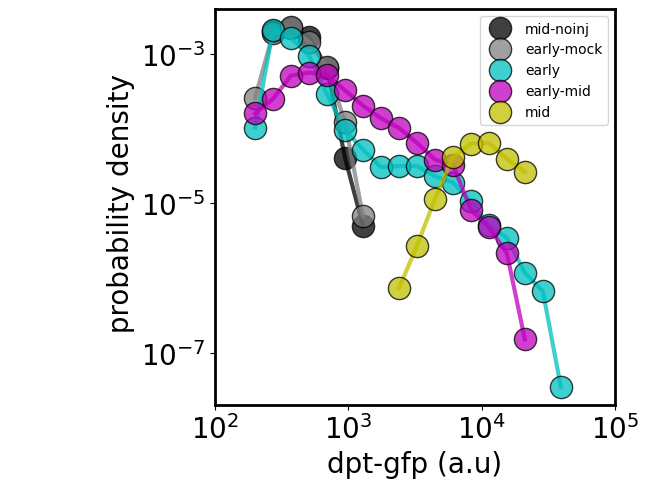

In [255]:
# probability densities of all cell levels

plt.figure()
num_bins = 20
bins = np.logspace(2.3, 5, num_bins+1)

# ml3_24_no_inj
df = df_mL3_24_noinj
intens = df.dpt_gfp
counts, _bins = np.histogram(intens, bins)
bin_widths = np.diff(bins)
bins = bins[:-1]
prob_dens = counts / np.sum(counts) / bin_widths

plt.plot(bins[prob_dens > 0], prob_dens[prob_dens > 0], 'k-', linewidth=3, label='_no_label_', alpha=0.75)
plt.plot(bins[prob_dens > 0], prob_dens[prob_dens > 0], 'ko', markersize=16, markerfacecolor='k', label='mid-noinj', alpha=0.75)

# el3_ctl
df = df_eL3_ctl
intens = df.dpt_gfp
counts, _bins = np.histogram(intens, bins)
bin_widths = np.diff(bins)
bins = bins[:-1]
prob_dens = counts / np.sum(counts) / bin_widths
bins_ctl = bins
prob_dens_ctl = prob_dens

plt.plot(bins[prob_dens > 0], prob_dens[prob_dens > 0], '-', linewidth=3, color=[0.5, 0.5, 0.5], label='_no_label_', alpha=0.75)
plt.plot(bins[prob_dens > 0], prob_dens[prob_dens > 0], 'ko', markersize=16, markerfacecolor=[0.5, 0.5, 0.5], label='early-mock', alpha=0.75)

# el3_24
df = df_eL3_24
intens = df.dpt_gfp - (df.bkg - 300)
counts, _bins = np.histogram(intens, bins)
bin_widths = np.diff(bins)
bins = bins[:-1]
prob_dens = counts / np.sum(counts) / bin_widths

plt.plot(bins[prob_dens > 0], prob_dens[prob_dens > 0], 'c-', linewidth=3, label='_no_label_', alpha=0.75)
plt.plot(bins[prob_dens > 0], prob_dens[prob_dens > 0], 'ko', markersize=16, markerfacecolor='c', label='early', alpha=0.75)

# mod_el3_24
df = df_mod_eL3_24
intens = df.dpt_gfp - (df.bkg - 300)
counts, _bins = np.histogram(intens, bins)
bin_widths = np.diff(bins)
bins = bins[:-1]
prob_dens = counts / np.sum(counts) / bin_widths

plt.plot(bins[prob_dens > 0], prob_dens[prob_dens > 0], 'm-', linewidth=3, label='_no_label_', alpha=0.75)
plt.plot(bins[prob_dens > 0], prob_dens[prob_dens > 0], 'ko', markersize=16, markerfacecolor='m', label='early-mid', alpha=0.75)


# ml3_24
df = df_mL3_24
intens = df.dpt_gfp - (df.bkg - 300)
counts, _bins = np.histogram(intens, bins)
bin_widths = np.diff(bins)
bins = bins[:-1]
prob_dens = counts / np.sum(counts) / bin_widths

plt.plot(bins[prob_dens > 0], prob_dens[prob_dens > 0], 'y-', linewidth=3, label='_no_label_', alpha=0.75)
plt.plot(bins[prob_dens > 0], prob_dens[prob_dens > 0], 'ko', markersize=16, markerfacecolor='y', label='mid', alpha=0.75)





plt.yscale('log')
plt.xscale('log')
plt.xlim([1e2, 1e5])
plt.xlabel('dpt-gfp (a.u)', fontsize=fontsize)
plt.ylabel('\n \n \n probability density', fontsize=fontsize)
plt.yticks([1e-7, 1e-5, 1e-3])
plt.xticks([1e2, 1e3, 1e4, 1e5])
#plt.title('raw distributions, E. coli vs mock, 24hrs')
plt.legend()
plt.minorticks_off()
ax = plt.gca()
fontweight = 'bold'
fontproperties = {'family':'sans-serif','sans-serif':['Helvetica'],'weight' : fontweight, 'size' : fontsize}
ax.xaxis.set_tick_params(labelsize=20)
ax.yaxis.set_tick_params(labelsize=20)
for tick in ax.xaxis.get_major_ticks():
    tick.label1.set_fontsize(fontsize)
for tick in ax.yaxis.get_major_ticks():
    tick.label1.set_fontsize(fontsize)
    
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=1.0)

plt.savefig(r'/media/brandon/Data1/Brandon/fly_immune/diptericin_paper/manual_analysis/bkg_subtracted_dists.pdf')




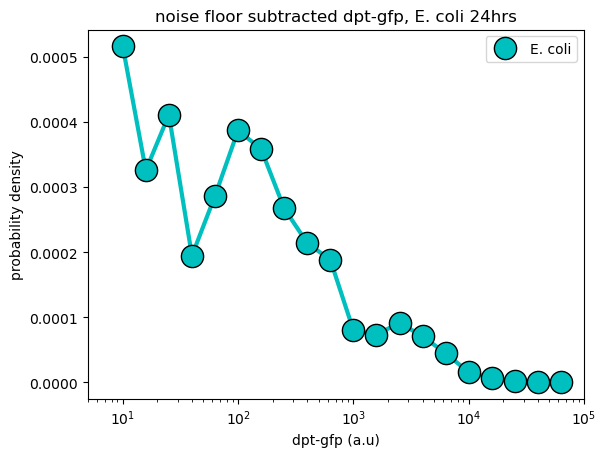

In [342]:
# noise subtracted
thresh = np.quantile(df_eL3_ctl.dpt_gfp, q=0.95)
intens = df_eL3_24.dpt_gfp - thresh
intens = intens[intens > 0]

num_bins = 20
bins = np.logspace(1, 5, num_bins+1)
plt.figure()
counts, _bins = np.histogram(intens, bins)
bin_widths = np.diff(bins)
bins = bins[:-1]
prob_dens = counts / np.sum(counts) / bin_widths

plt.plot(bins, prob_dens, 'c-', linewidth=3, label='_no_label_')
plt.plot(bins, prob_dens, 'ko', markersize=16, markerfacecolor='c', label='E. coli')

plt.yscale('linear')
plt.xscale('log')
plt.xlim([5, 1e5])
plt.xlabel('dpt-gfp (a.u)')
plt.ylabel('probability density')
plt.title('noise floor subtracted dpt-gfp, E. coli 24hrs')
plt.legend()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


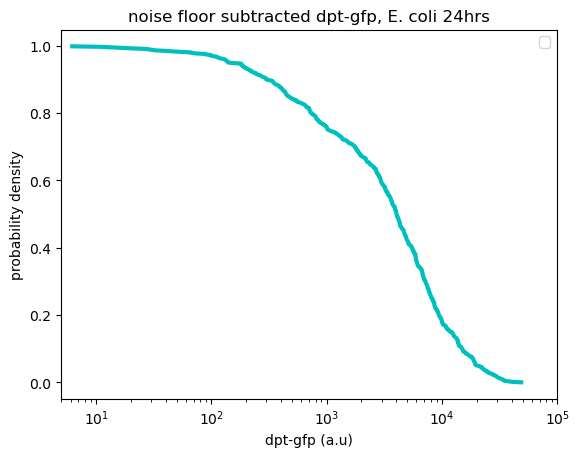

In [343]:
"""noise substracted pool cum dist"""
thresh = np.quantile(df_eL3_ctl.dpt_gfp, q=0.95)
intens = df_eL3_24.dpt_gfp - thresh
intens = intens[intens > 0]

intens = np.sort(intens)
cum_dist = np.zeros_like(intens)
for i in range(len(intens)):
    cum_dist[i] = np.sum(intens > intens[i]) / len(intens)
    
plt.plot(intens, cum_dist, 'c-', linewidth=3, label='_no_label_')
#plt.plot(intens, cum_dist, 'ko', markersize=16, markerfacecolor='c', label='E. coli')

plt.yscale('linear')
plt.xscale('log')
plt.xlim([5, 1e5])
plt.xlabel('dpt-gfp (a.u)')
plt.ylabel('probability density')
plt.title('noise floor subtracted dpt-gfp, E. coli 24hrs')
plt.legend()

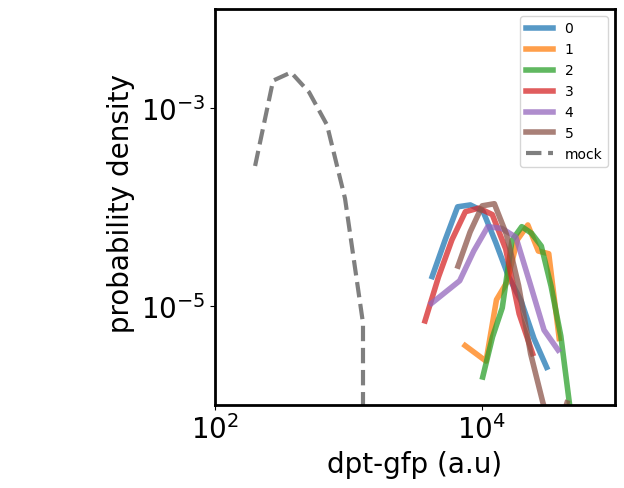

In [254]:
"""noise floor subtracted dist, plot every dist individually"""
thresh = 0 * np.quantile(df_eL3_ctl.dpt_gfp, q=0.95)
num_bins = 10
bins = np.logspace(1, 5, num_bins+1)
df = df_mL3_24 # df_eL4_24
plt.figure()

for larvae in np.unique(df.experiment_id):
    sub_df = df[df.experiment_id == larvae]
    intens = sub_df.dpt_gfp - (sub_df.bkg - 300)
    bins = np.logspace(np.log10(np.min(intens)), np.log10(np.max(intens)), num_bins+ 1 )
    counts, _bins = np.histogram(intens, bins)
    bin_widths = np.diff(bins)
    bins = bins[:-1]
    prob_dens = counts / np.sum(counts) / bin_widths
    plot_bins = bins[prob_dens > 0]
    prob_dens = prob_dens[prob_dens > 0]
    
    #plt.plot(bins, prob_dens, 'c-', linewidth=3, alpha=0.5, label='_no_label_')
    plt.plot(plot_bins, prob_dens, '-', linewidth=4, alpha=0.75, label=str(larvae))
    #plt.plot(plot_bins, prob_dens, 'o', linewidth=3, alpha=0.5, label='_no_label_')
plt.plot(bins_ctl, prob_dens_ctl, 'k--', alpha=0.5, label='mock', linewidth=3)    

#
# num_bins = 20
# bins = np.logspace(2.3, 5, num_bins+1)
# intens = df.dpt_gfp - (df.bkg - 300)
# counts, _bins = np.histogram(intens, bins)
# bin_widths = np.diff(bins)
# bins = bins[:-1]
# prob_dens = counts / np.sum(counts) / bin_widths
# #plt.plot(bins[prob_dens > 0], prob_dens[prob_dens > 0], 'k--', linewidth=6, label='pooled', alpha=0.75)
#plt.plot(bins[prob_dens > 0], prob_dens[prob_dens > 0], 'ko', markersize=16, markerfacecolor='m', label='mod_eL3-E. coli', alpha=0.75)

plt.yscale('log')
plt.xscale('log')
plt.xlim([1e2, 1e5])
plt.xlabel('dpt-gfp (a.u)', fontsize=fontsize)
plt.ylabel('\n \n \n probability density', fontsize=fontsize)
plt.ylim([1e-6, 1e-2])
plt.yticks([1e-5, 1e-3])
#plt.title('raw distributions, E. coli vs mock, 24hrs')
plt.legend()
plt.minorticks_off()
ax = plt.gca()
fontweight = 'bold'
fontproperties = {'family':'sans-serif','sans-serif':['Helvetica'],'weight' : fontweight, 'size' : fontsize}
ax.xaxis.set_tick_params(labelsize=20)
ax.yaxis.set_tick_params(labelsize=20)
for tick in ax.xaxis.get_major_ticks():
    tick.label1.set_fontsize(fontsize)
for tick in ax.yaxis.get_major_ticks():
    tick.label1.set_fontsize(fontsize)
    
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=1.0)
plt.savefig(r'/media/brandon/Data1/Brandon/fly_immune/diptericin_paper/manual_analysis/mL3_24_bkg_sub_dists_individuals.pdf')

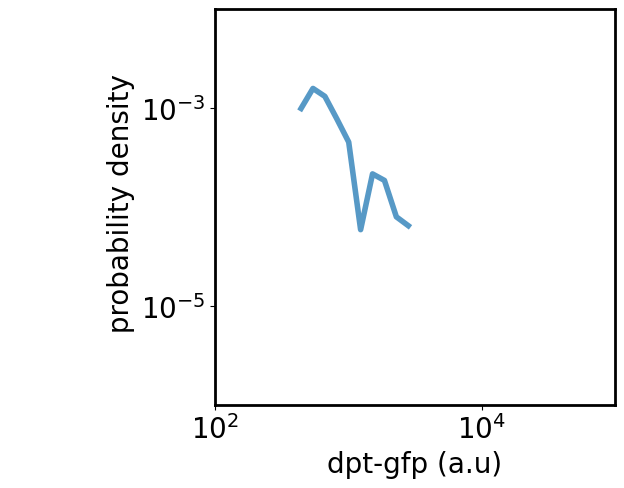

In [185]:
df = df_mod_eL3_24 # df_eL4_24
sub_df = df[df.experiment_id==0]
num_bins = 10
bins = np.logspace(1, 5, num_bins+1)
intens = sub_df.dpt_gfp - 0 * (sub_df.bkg - 300)
bins = np.logspace(np.log10(np.min(intens)), np.log10(np.max(intens)), num_bins+ 1 )
counts, _bins = np.histogram(intens, bins)
bin_widths = np.diff(bins)
bins = bins[:-1]
prob_dens = counts / np.sum(counts) / bin_widths
plot_bins = bins[prob_dens > 0]
prob_dens = prob_dens[prob_dens > 0]
plt.figure()
plt.plot(plot_bins, prob_dens, '-', linewidth=4, alpha=0.75, label=str(larvae))
plt.yscale('log')
plt.xscale('log')
plt.xlim([1e2, 1e5])
plt.xlabel('dpt-gfp (a.u)', fontsize=fontsize)
plt.ylabel('\n \n \n probability density', fontsize=fontsize)
plt.ylim([1e-6, 1e-2])
plt.yticks([1e-5, 1e-3])
#plt.title('raw distributions, E. coli vs mock, 24hrs')
#plt.legend()
plt.minorticks_off()
ax = plt.gca()
fontweight = 'bold'
fontproperties = {'family':'sans-serif','sans-serif':['Helvetica'],'weight' : fontweight, 'size' : fontsize}
ax.xaxis.set_tick_params(labelsize=20)
ax.yaxis.set_tick_params(labelsize=20)
for tick in ax.xaxis.get_major_ticks():
    tick.label1.set_fontsize(fontsize)
for tick in ax.yaxis.get_major_ticks():
    tick.label1.set_fontsize(fontsize)
    
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=1.0)

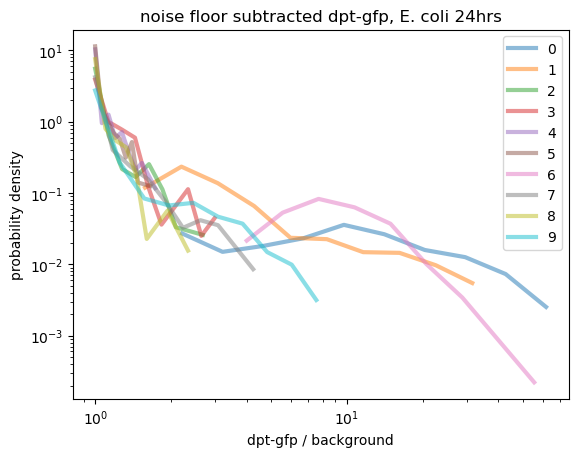

In [404]:
"""noise floor subtracted dist, plot every dist individually"""
thresh = np.quantile(df_eL3_ctl.dpt_gfp, q=0.5)
num_bins = 10
bins = np.logspace(1, 5, num_bins+1)

plt.figure()
for larvae in np.unique(df_eL3_24.experiment_id):
    sub_df = df_eL3_24[df_eL3_24.experiment_id == larvae]
    #intens = sub_df.dpt_gfp - thresh
    #intens = intens[intens > 0]
    intens = sub_df.dpt_gfp.copy()
    intens[intens < thresh] = thresh
    intens = intens / thresh
    bins = np.logspace(np.log10(np.min(intens)), np.log10(np.max(intens)), num_bins+ 1 )
    counts, _bins = np.histogram(intens, bins)
    bin_widths = np.diff(bins)
    bins = bins[:-1]
    prob_dens = counts / np.sum(counts) / bin_widths
    plot_bins = bins[prob_dens > 0]
    prob_dens = prob_dens[prob_dens > 0]
    
    #plt.plot(bins, prob_dens, 'c-', linewidth=3, alpha=0.5, label='_no_label_')
    plt.plot(plot_bins, prob_dens, '-', linewidth=3, alpha=0.5, label=str(larvae))
    #plt.plot(plot_bins, prob_dens, 'o', linewidth=3, alpha=0.5, label='_no_label_')

    
plt.yscale('log')
plt.xscale('log')
#plt.xlim([5, 1e5])
#plt.ylim([0, 0.01])
plt.xlabel('dpt-gfp / background')
plt.ylabel('probability density')
plt.title('noise floor subtracted dpt-gfp, E. coli 24hrs')
plt.legend()

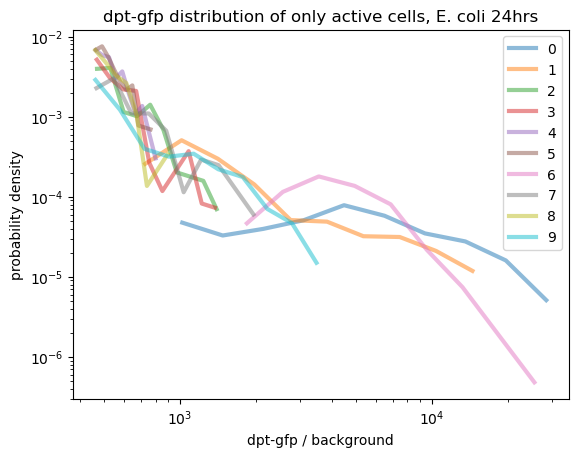

In [405]:
"""only active cells. plot every dist individually"""
thresh = np.quantile(df_eL3_ctl.dpt_gfp, q=0.50)
num_bins = 10
bins = np.logspace(1, 5, num_bins+1)

plt.figure()
for larvae in np.unique(df_eL3_24.experiment_id):
    sub_df = df_eL3_24[df_eL3_24.experiment_id == larvae]
    #intens = sub_df.dpt_gfp - thresh
    #intens = intens[intens > 0]
    intens = sub_df.dpt_gfp.copy()
    intens = intens[intens > thresh]
    bins = np.logspace(np.log10(np.min(intens)), np.log10(np.max(intens)), num_bins+ 1 )
    counts, _bins = np.histogram(intens, bins)
    bin_widths = np.diff(bins)
    bins = bins[:-1]
    prob_dens = counts / np.sum(counts) / bin_widths
    plot_bins = bins[prob_dens > 0]
    prob_dens = prob_dens[prob_dens > 0]
    
    #plt.plot(bins, prob_dens, 'c-', linewidth=3, alpha=0.5, label='_no_label_')
    plt.plot(plot_bins, prob_dens, '-', linewidth=3, alpha=0.5, label=str(larvae))
    #plt.plot(plot_bins, prob_dens, 'o', linewidth=3, alpha=0.5, label='_no_label_')

    
plt.yscale('log')
plt.xscale('log')
#plt.xlim([5, 1e5])
#plt.ylim([0, 0.01])
plt.xlabel('dpt-gfp / background')
plt.ylabel('probability density')
plt.title('dpt-gfp distribution of only active cells, E. coli 24hrs')
plt.legend()

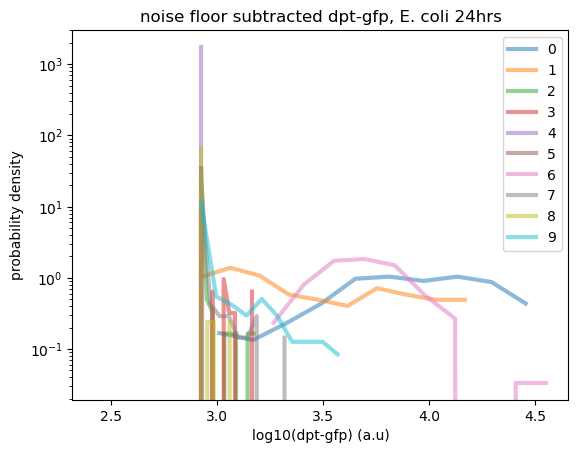

In [345]:
"""noise floor subtracted dist, plot every dist individually. log intens, bins picked for each larvae"""
thresh = np.quantile(df_eL3_ctl.dpt_gfp, q=0.95)
num_bins = 20
bins = np.logspace(1, 5, num_bins+1)

plt.figure()
for larvae in np.unique(df_eL3_24.experiment_id):
    sub_df = df_eL3_24[df_eL3_24.experiment_id == larvae]
#     intens = sub_df.dpt_gfp - thresh
#     intens = np.log10(intens[intens > 0].astype('float64'))
    intens = sub_df.dpt_gfp.copy()
    intens[intens < thresh] = thresh
    intens = np.log10(intens.astype('float64'))

    counts, bins = np.histogram(intens, bins=10)
    bin_widths = np.diff(bins)
    bins = bins[:-1]
    prob_dens = counts / np.sum(counts) / bin_widths
    #plot_bins = bins[prob_dens > 0]
    #prob_dens = prob_dens[prob_dens > 0]
    
    #plt.plot(bins, prob_dens, 'c-', linewidth=3, alpha=0.5, label='_no_label_')
    plt.plot(bins, prob_dens, '-', linewidth=3, alpha=0.5, label=str(larvae))
    #plt.plot(plot_bins, prob_dens, 'o', linewidth=3, alpha=0.5, label='_no_label_')

    
plt.yscale('log')
plt.xscale('linear')
#plt.xlim([5, 1e5])
#plt.ylim([0, 0.01])
plt.xlabel('log10(dpt-gfp) (a.u)')
plt.ylabel('probability density')
plt.title('noise floor subtracted dpt-gfp, E. coli 24hrs')
plt.legend()

/tmp/ipykernel_2044464/4130059506.py:15: RuntimeWarning: invalid value encountered in true_divide
  prob_dens = counts / np.sum(counts) / bin_widths


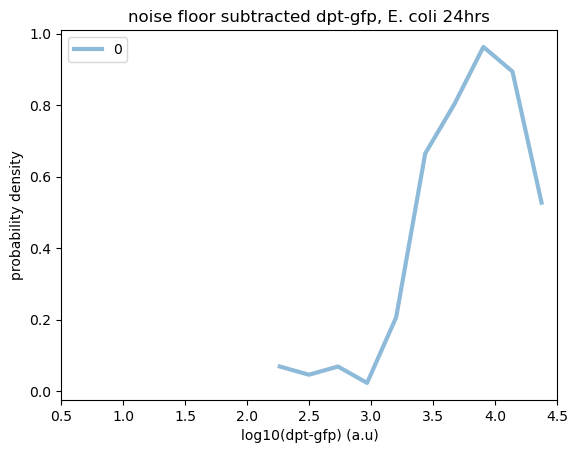

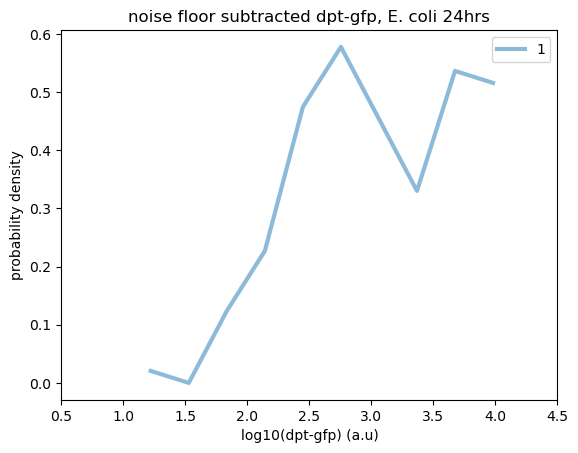

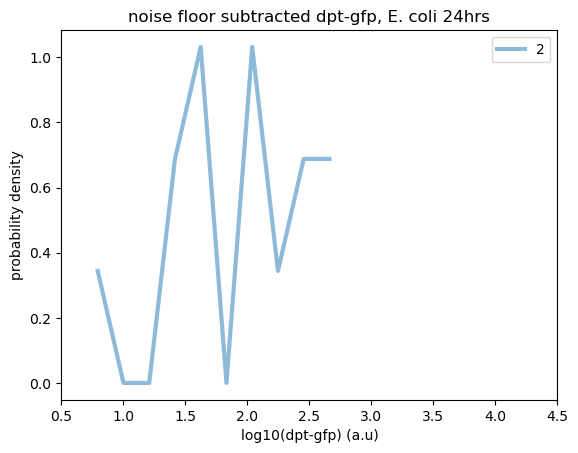

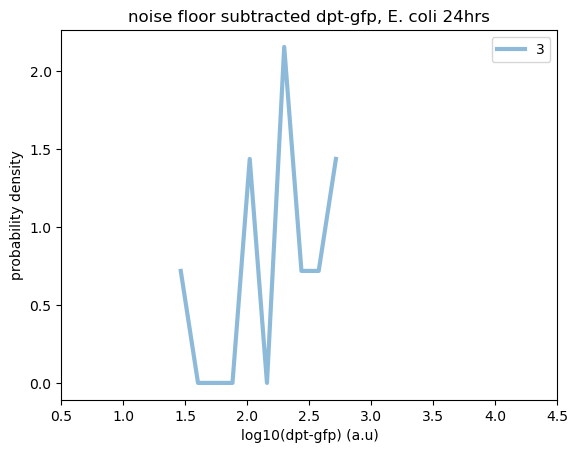

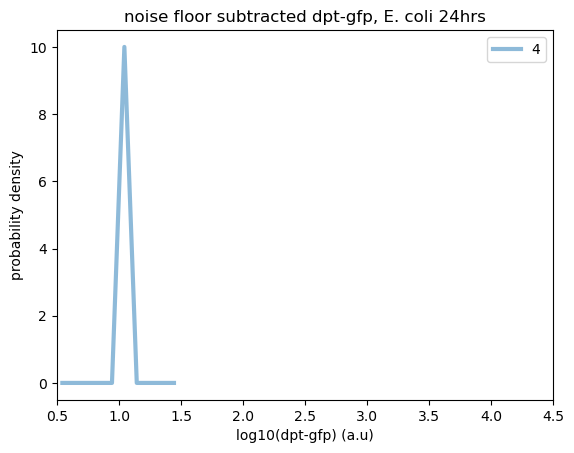

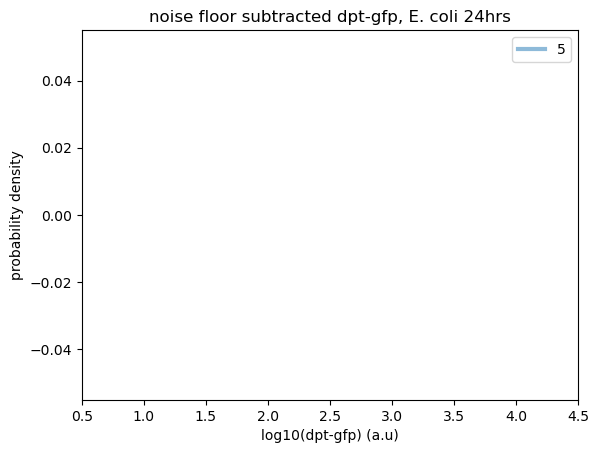

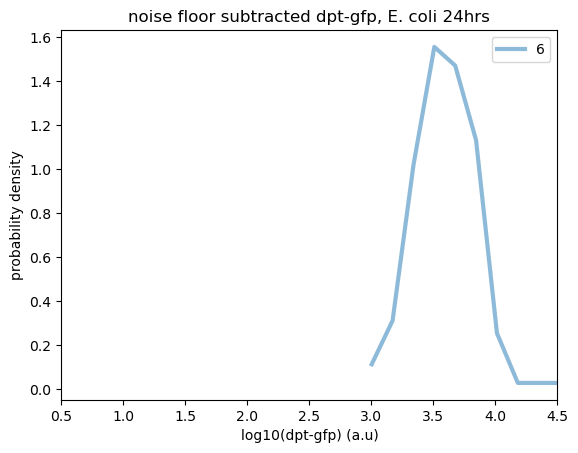

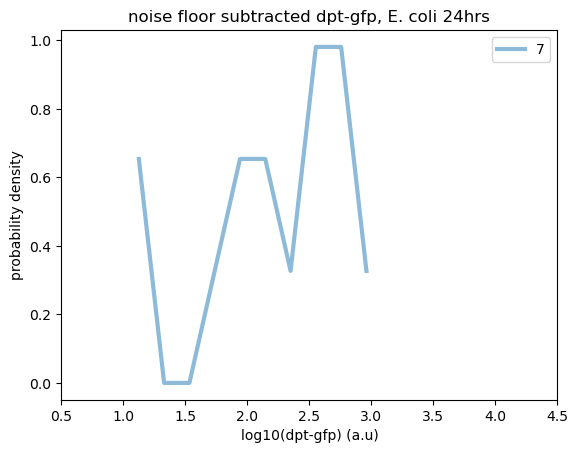

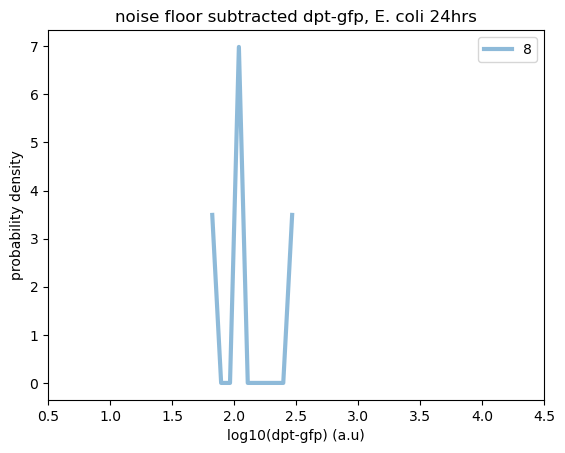

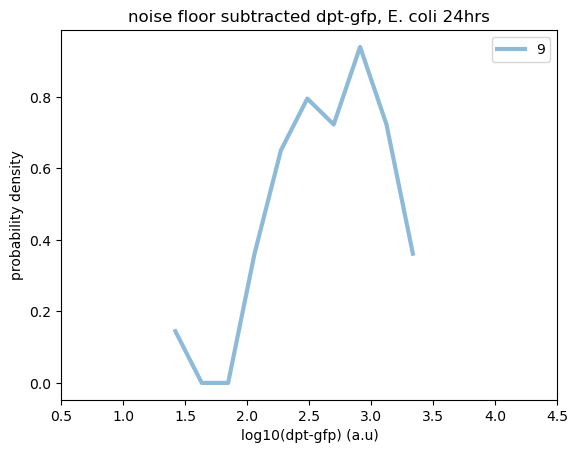

In [346]:
"""noise floor subtracted dist, plot every dist individually. log intens, bins picked for each larvae"""
thresh = np.quantile(df_eL3_ctl.dpt_gfp, q=0.95)
num_bins = 20
bins = np.logspace(1, 5, num_bins+1)

for larvae in np.unique(df_eL3_24.experiment_id):
    plt.figure()
    sub_df = df_eL3_24[df_eL3_24.experiment_id == larvae]
    intens = sub_df.dpt_gfp - thresh
    intens = np.log10(intens[intens > 0].astype('float64'))

    counts, bins = np.histogram(intens, bins=10)
    bin_widths = np.diff(bins)
    bins = bins[:-1]
    prob_dens = counts / np.sum(counts) / bin_widths
    #plot_bins = bins[prob_dens > 0]
    #prob_dens = prob_dens[prob_dens > 0]
    
    #plt.plot(bins, prob_dens, 'c-', linewidth=3, alpha=0.5, label='_no_label_')
    plt.plot(bins, prob_dens, '-', linewidth=3, alpha=0.5, label=str(larvae))
    #plt.plot(plot_bins, prob_dens, 'o', linewidth=3, alpha=0.5, label='_no_label_')
    
    plt.yscale('linear')
    plt.xscale('linear')
    plt.xlim([0.5, 4.5])
    #plt.ylim([0, 0.01])
    plt.xlabel('log10(dpt-gfp) (a.u)')
    plt.ylabel('probability density')
    plt.title('noise floor subtracted dpt-gfp, E. coli 24hrs')
    plt.legend()



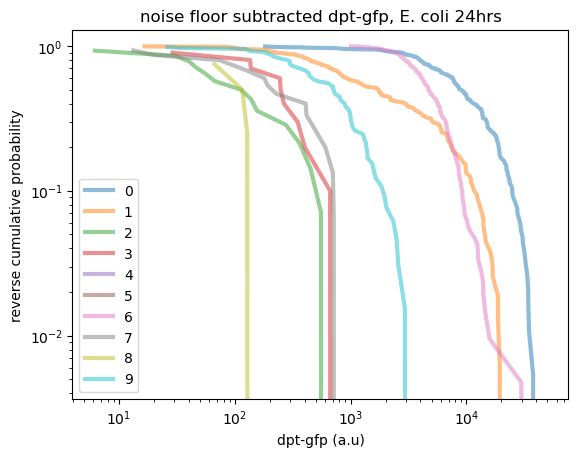

In [353]:
"""noise floor subtracted dist, plot every dist individually, reverse cumulative dist"""
thresh = np.quantile(df_eL3_ctl.dpt_gfp, q=0.95)
num_bins = 20
bins = np.logspace(1, 5, num_bins+1)

plt.figure()
for larvae in np.unique(df_eL3_24.experiment_id):
    sub_df = df_eL3_24[df_eL3_24.experiment_id == larvae]
    intens = sub_df.dpt_gfp - thresh
    intens = intens[intens > 0]
    #intens = intens / np.sum(intens)
    #print(len(intens))

    intens = np.sort(intens)
    cum_dist = np.zeros_like(intens)
    for i in range(len(intens)):
        cum_dist[i] = np.sum(intens > intens[i]) / len(intens)
    
    plt.plot(intens, cum_dist, '-', linewidth=3, alpha=0.5, label=str(larvae))

    
plt.yscale('log')
plt.xscale('log')
#plt.xlim([5, 1e5])
#plt.ylim([0, 0.01])
plt.xlabel('dpt-gfp (a.u)')
plt.ylabel('reverse cumulative probability')
plt.title('noise floor subtracted dpt-gfp, E. coli 24hrs')
plt.legend()

/tmp/ipykernel_2044464/2471980691.py:20: UserWarning: Data has no positive values, and therefore cannot be log-scaled.
  plt.yscale('log')


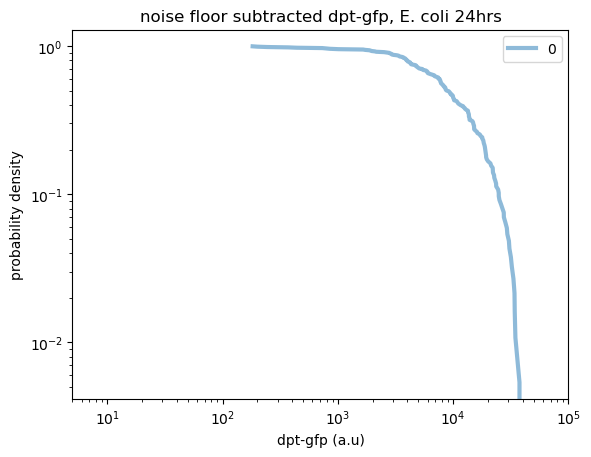

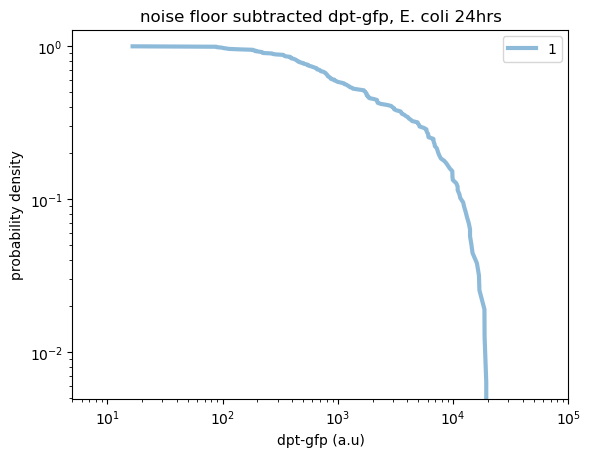

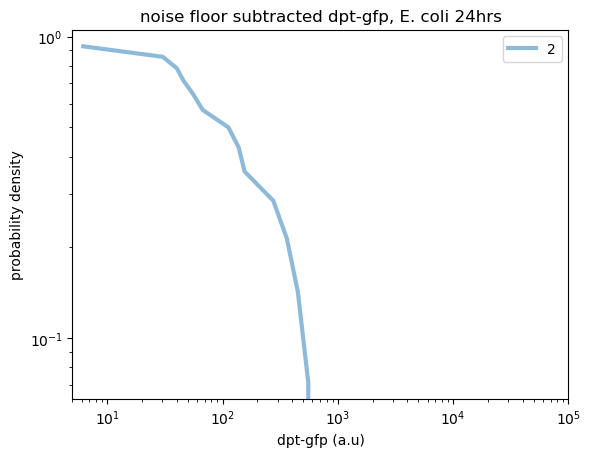

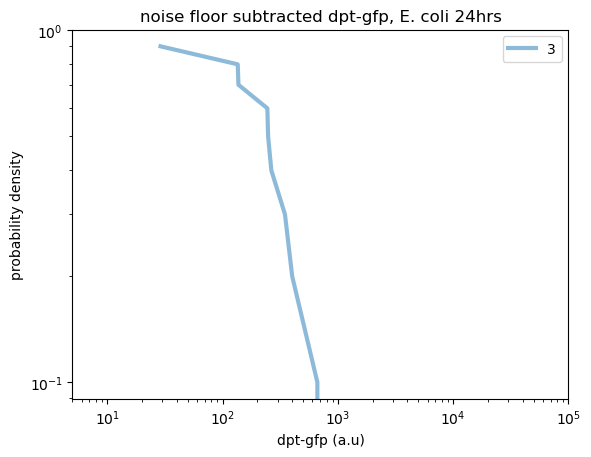

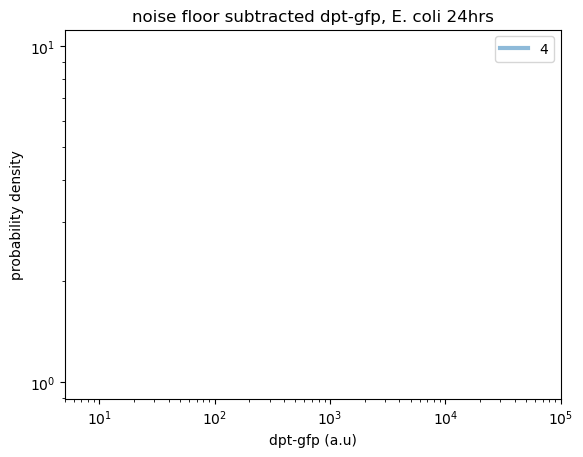

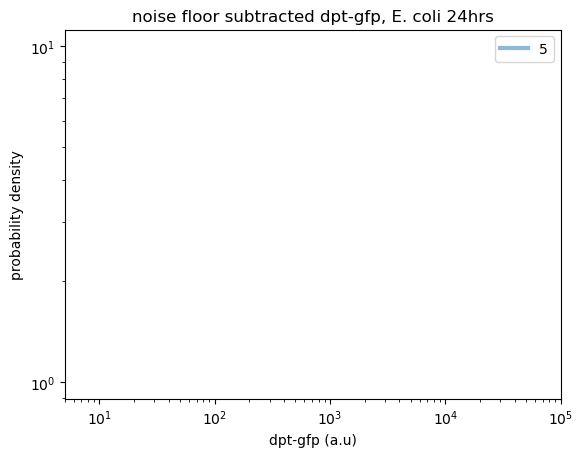

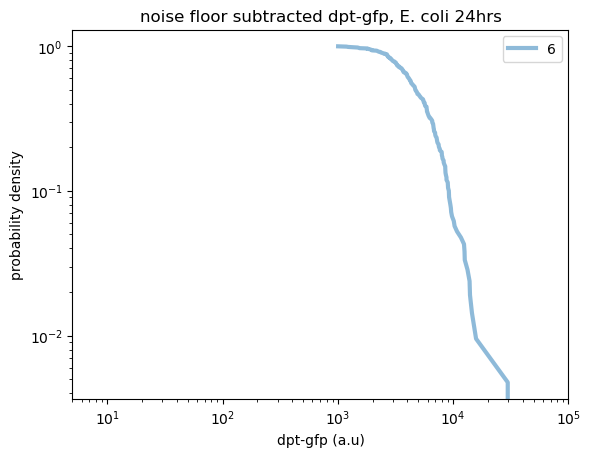

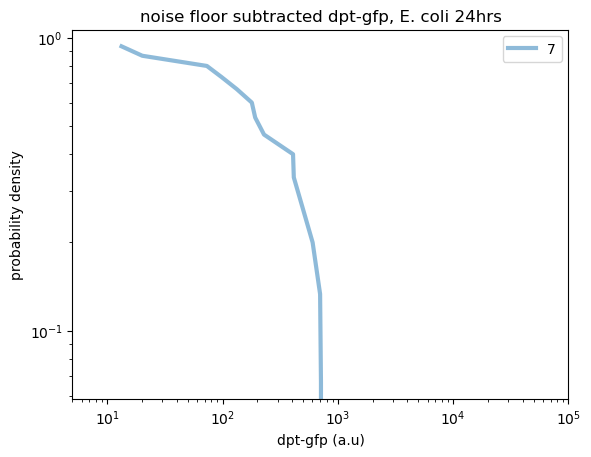

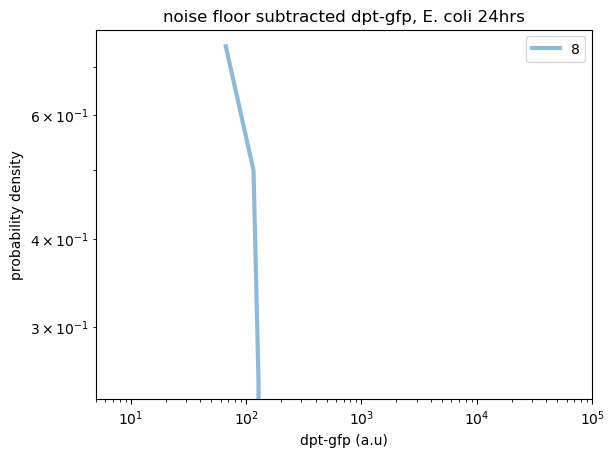

In [221]:
"""noise floor subtracted dist, plot every dist individually, reverse cumulative dist"""
thresh = np.quantile(df_eL3_ctl.dpt_gfp, q=0.95)
num_bins = 20
bins = np.logspace(1, 5, num_bins+1)

for larvae in np.unique(df_eL3_24.experiment_id):
    plt.figure()
    sub_df = df_eL3_24[df_eL3_24.experiment_id == larvae]
    intens = sub_df.dpt_gfp - thresh
    intens = intens[intens > 0]

    intens = np.sort(intens)
    cum_dist = np.zeros_like(intens)
    for i in range(len(intens)):
        cum_dist[i] = np.sum(intens > intens[i]) / len(intens)
    
    plt.plot(intens, cum_dist, '-', linewidth=3, alpha=0.5, label=str(larvae))

    
    plt.yscale('log')
    plt.xscale('log')
    plt.xlim([5, 1e5])
    #plt.ylim([0, 0.01])
    plt.xlabel('dpt-gfp (a.u)')
    plt.ylabel('probability density')
    plt.title('noise floor subtracted dpt-gfp, E. coli 24hrs')
    plt.legend()

186
162
221
117
156
167
210
158
277
332


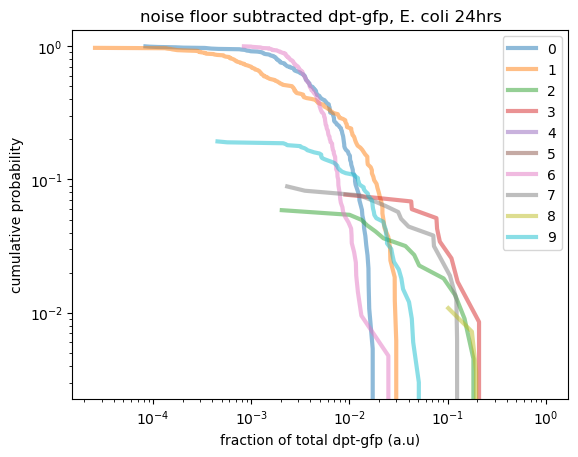

In [348]:
"""noise floor subtracted dist, plot every dist individually,  cumulative dist"""
thresh = np.quantile(df_eL3_ctl.dpt_gfp, q=0.95)
num_bins = 20
bins = np.logspace(1, 5, num_bins+1)

plt.figure()
for larvae in np.unique(df_eL3_24.experiment_id):
    sub_df = df_eL3_24[df_eL3_24.experiment_id == larvae]
    intens = sub_df.dpt_gfp - thresh
    total_num_cells = len(intens)
    print(total_num_cells)
    intens = intens[intens > 0]
    intens = intens / np.sum(intens)

    intens = np.sort(intens)
    cum_dist = np.zeros_like(intens)
    for i in range(len(intens)):
        cum_dist[i] = np.sum(intens > intens[i]) / total_num_cells #len(intens)
    
    plt.plot(intens, cum_dist, '-', linewidth=3, alpha=0.5, label=str(larvae))

    
plt.yscale('log')
plt.xscale('log')
#plt.xlim([5, 1e5])
#plt.ylim([0, 0.01])
plt.xlabel('fraction of total dpt-gfp (a.u)')
plt.ylabel('cumulative probability')
plt.title('noise floor subtracted dpt-gfp, E. coli 24hrs')
plt.legend()

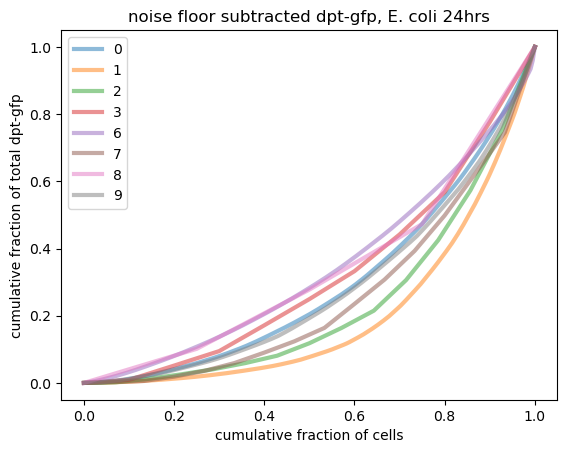

In [349]:
"""noise floor subtracted lorenz curve, plot every larvae individually"""
thresh = np.quantile(df_eL3_ctl.dpt_gfp, q=0.95)
num_bins = 20
bins = np.logspace(1, 5, num_bins+1)

plt.figure()
for larvae in np.unique(df_eL3_24.experiment_id):
    sub_df = df_eL3_24[df_eL3_24.experiment_id == larvae]
    intens = sub_df.dpt_gfp.values.astype('float64') - thresh
    intens = intens[intens > 0]
    intens = np.sort(intens)
    lorenz = np.cumsum(intens) / np.sum(intens)
    lorenz = np.insert(lorenz, 0, 0)
    if len(lorenz) < 3:
        continue
    
    cell_fraction = np.arange(len(lorenz)) / (len(lorenz) - 1)
#     cell_fraction = cell_fraction[intens > 0]
#     intens = intens[intens > 0]
    
    plt.plot(cell_fraction, lorenz, '-', linewidth=3, alpha=0.5, label=str(larvae))

    
plt.yscale('linear')
plt.xscale('linear')
#plt.xlim([5, 1e5])
#plt.ylim([0, 0.01])
plt.xlabel('cumulative fraction of cells')
plt.ylabel('cumulative fraction of total dpt-gfp')
plt.title('noise floor subtracted dpt-gfp, E. coli 24hrs')
plt.legend()

In [321]:
intens = sub_df.dpt_gfp.values.astype('float64') - thresh
intens = intens[intens > 0]
intens = intens / np.sum(intens)
print(intens)

[0.17638776 0.10143707 0.19496244 0.52721274]


/tmp/ipykernel_2044464/639557284.py:15: RuntimeWarning: invalid value encountered in true_divide
  prob_dens = counts / np.sum(counts) / bin_widths


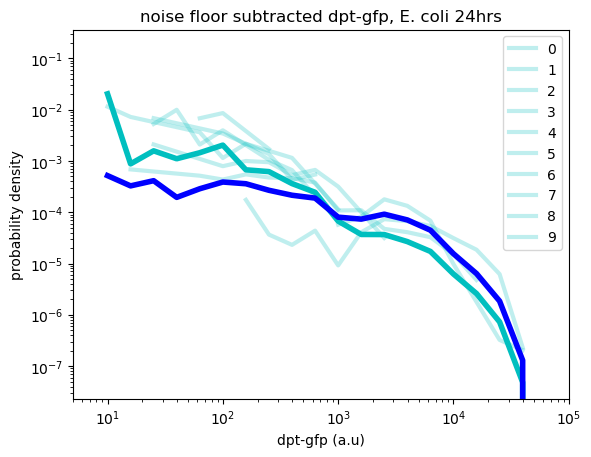

In [350]:
"""noise floor subtracted dist, average individual dists"""
thresh = np.quantile(df_eL3_ctl.dpt_gfp, q=0.95)
num_bins = 20
all_dists = np.zeros((len(np.unique(df_eL3_24.experiment_id)), num_bins))
plt.figure()
for larvae in np.unique(df_eL3_24.experiment_id):
    bins = np.logspace(1, 5, num_bins+1)
    sub_df = df_eL3_24[df_eL3_24.experiment_id == larvae]
    intens = sub_df.dpt_gfp - thresh
    intens = intens[intens > 0]

    counts, _bins = np.histogram(intens, bins)
    bin_widths = np.diff(bins)
    bins = bins[:-1]
    prob_dens = counts / np.sum(counts) / bin_widths
    all_dists[larvae] = prob_dens
    plot_bins = bins[prob_dens > 0]
    prob_dens = prob_dens[prob_dens > 0]
    
    #plt.plot(bins, prob_dens, 'c-', linewidth=3, alpha=0.5, label='_no_label_')
    plt.plot(plot_bins, prob_dens, '-', linewidth=3, alpha=0.25, label=str(larvae), color='c')
    #plt.plot(plot_bins, prob_dens, 'o', linewidth=3, alpha=0.5, label='_no_label_')


plt.plot(bins, np.nanmean(all_dists, axis=0), linewidth=4, color='c')  
intens = df_eL3_24.dpt_gfp - thresh
intens = intens[intens > 0]

num_bins = 20
bins = np.logspace(1, 5, num_bins+1)
counts, _bins = np.histogram(intens, bins)
bin_widths = np.diff(bins)
bins = bins[:-1]
prob_dens = counts / np.sum(counts) / bin_widths
plt.plot(bins, prob_dens, linewidth=4, color='b')  

plt.yscale('log')
plt.xscale('log')
plt.xlim([5, 1e5])
#plt.ylim([0, 0.01])
plt.xlabel('dpt-gfp (a.u)')
plt.ylabel('probability density')
plt.title('noise floor subtracted dpt-gfp, E. coli 24hrs')
plt.legend()

(array([ 7., 24., 52., 55., 45., 17.,  8.,  0.,  1.,  1.]),
 array([3.26594993, 3.40868017, 3.55141041, 3.69414065, 3.83687089,
        3.97960113, 4.12233137, 4.26506161, 4.40779185, 4.55052209,
        4.69325233]),
 <BarContainer object of 10 artists>)

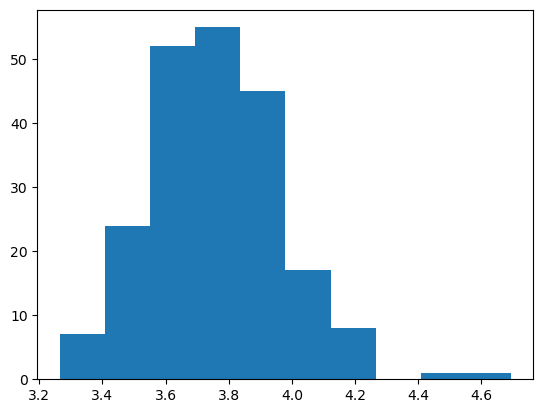

In [176]:
plt.hist(np.log10(df_eL3_24[df_eL3_24.experiment_id==6].dpt_gfp.astype('float64')))

In [139]:
larvae=0
sub_df = df_eL3_24[df_eL3_24.experiment_id == larvae]
intens = sub_df.dpt_gfp - thresh
intens = intens[intens > 0]
bins = np.logspace(1, 5, num_bins+1)
counts, _bins = np.histogram(intens, bins)
print(counts)
print()
sub_df

[ 0  0  0  0  0  0  3  1  1  3  1  7 20 29 37 34 32 17  1  0]



,experiment_id,y,x,dpt_gfp,mem_mch
0,0,2148.644674,608.620132,29201.995227,7301.75895
1,0,2269.900387,587.429813,38447.618934,8533.741448
2,0,2408.8147,590.961533,31592.720764,7960.165473
3,0,2497.107695,553.289855,25381.107399,8997.516309
4,0,2578.337251,541.517456,22872.779634,9593.929196
...,...,...,...,...,...
181,0,9020.909285,1433.206002,1642.725537,4755.253779
182,0,9582.551917,2379.435966,1021.729515,5693.501193
183,0,9521.598453,2524.563261,1039.701671,4512.327765
184,0,8758.228881,2485.378891,2803.456643,4235.325378


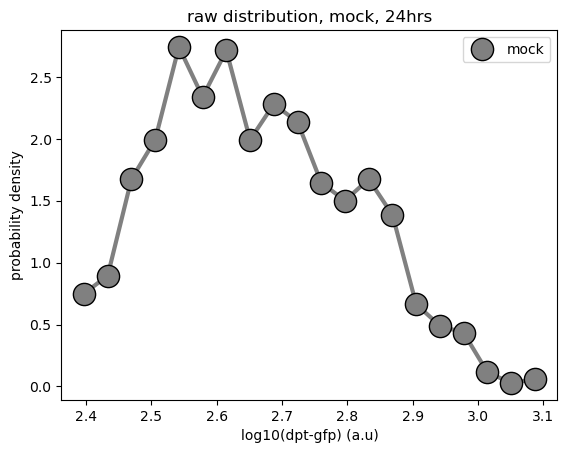

In [125]:
plt.figure()
counts, bins = np.histogram(np.log10(df_eL3_ctl.dpt_gfp.astype('float64')), bins=20)
bin_widths = np.diff(bins)
bins = bins[:-1]
prob_dens = counts / np.sum(counts) / bin_widths

plt.plot(bins, prob_dens, '-', linewidth=3, color=[0.5, 0.5, 0.5], label='_no_label_')
plt.plot(bins, prob_dens, 'ko', markersize=16, markerfacecolor=[0.5, 0.5, 0.5], label='mock')
plt.xlabel('log10(dpt-gfp) (a.u)')
plt.ylabel('probability density')
plt.title('raw distribution, mock, 24hrs')
plt.legend()

In [445]:
# red channel
# probability densities of all cell levels

plt.figure()
num_bins = 20
bins = np.logspace(3.2, 4.2, num_bins+1)

# el3_ctl
counts, _bins = np.histogram(df_eL3_ctl.mem_mch, bins)
bin_widths = np.diff(bins)
bins = bins[:-1]
prob_dens = counts / np.sum(counts) / bin_widths

plt.plot(bins, prob_dens, '-', linewidth=3, color=[0.5, 0.5, 0.5], label='_no_label_', alpha=0.75)
plt.plot(bins, prob_dens, 'ko', markersize=16, markerfacecolor=[0.5, 0.5, 0.5], label='mock', alpha=0.75)

# el3_24
counts, _bins = np.histogram(df_eL3_24.mem_mch, bins)
bin_widths = np.diff(bins)
bins = bins[:-1]
prob_dens = counts / np.sum(counts) / bin_widths

plt.plot(bins, prob_dens, 'm-', linewidth=3, label='_no_label_', alpha=0.75)
plt.plot(bins, prob_dens, 'ko', markersize=16, markerfacecolor='m', label='E. coli', alpha=0.75)

plt.yscale('log')
plt.xscale('log')
plt.xlim([1e2, 1e5])
plt.xlabel('membrane-mcherry (a.u)', fontsize=fontsize)
plt.ylabel('\n \n \n probability density', fontsize=fontsize)
plt.yticks([1e-7, 1e-5, 1e-3])
#plt.title('raw distributions, E. coli vs mock, 24hrs')
plt.legend()
plt.minorticks_off()
ax = plt.gca()
fontweight = 'bold'
fontproperties = {'family':'sans-serif','sans-serif':['Helvetica'],'weight' : fontweight, 'size' : fontsize}
ax.xaxis.set_tick_params(labelsize=20)
ax.yaxis.set_tick_params(labelsize=20)
for tick in ax.xaxis.get_major_ticks():
    tick.label1.set_fontsize(fontsize)
for tick in ax.yaxis.get_major_ticks():
    tick.label1.set_fontsize(fontsize)
    
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=1.0)
plt.savefig(r'/media/brandon/Data1/Brandon/fly_immune/diptericin_paper/manual_analysis/raw_dists_membrane.pdf')

In [110]:
np.max(df_eL3_ctl.mem_mch)

10627.080350039778

In [127]:
df_eL3_24

,experiment_id,y,x,dpt_gfp,mem_mch
0,0,2148.644674,608.620132,29201.995227,7301.75895
1,0,2269.900387,587.429813,38447.618934,8533.741448
2,0,2408.8147,590.961533,31592.720764,7960.165473
3,0,2497.107695,553.289855,25381.107399,8997.516309
4,0,2578.337251,541.517456,22872.779634,9593.929196
...,...,...,...,...,...
1649,8,3781.616622,1222.672107,324.784407,5695.793158
1650,8,3456.915278,967.70528,427.320605,5704.381862
1651,8,3607.28033,1148.579183,297.626889,6258.505967
1652,8,3456.915278,1043.977408,357.172633,6085.084328


In [189]:
experiment_paths = eL3_24_experiment_paths
for experiment_path in experiment_paths:
        larvae_dirs = glob(experiment_path + '/larvae*')
        for larvae_dir in larvae_dirs:
            if Path(larvae_dir + '/manual_df.pkl').is_file():
                print(larvae_dir)

/media/brandon/Data1/Brandon/fly_immune/Lightsheet_Z1/2023_02_07_dpt-gfp_r4-gal4_uas-mcd8-mcherry_ecoli-hs-dtom_earlyL3_24hrs/larvae_1
/media/brandon/Data1/Brandon/fly_immune/Lightsheet_Z1/2023_02_07_dpt-gfp_r4-gal4_uas-mcd8-mcherry_ecoli-hs-dtom_earlyL3_24hrs/larvae_5
/media/brandon/Data1/Brandon/fly_immune/Lightsheet_Z1/2023_02_07_dpt-gfp_r4-gal4_uas-mcd8-mcherry_ecoli-hs-dtom_earlyL3_24hrs/larvae_3
/media/brandon/Data1/Brandon/fly_immune/Lightsheet_Z1/2023_02_10_dpt-gfp_4r-gal4_uas-mcd8-mcherry_ecoli-hs-dtom_24hrs/larvae_1
/media/brandon/Data1/Brandon/fly_immune/Lightsheet_Z1/2023_02_10_dpt-gfp_4r-gal4_uas-mcd8-mcherry_ecoli-hs-dtom_24hrs/larvae_5
/media/brandon/Data1/Brandon/fly_immune/Lightsheet_Z1/2023_02_10_dpt-gfp_4r-gal4_uas-mcd8-mcherry_ecoli-hs-dtom_24hrs/larvae_3
/media/brandon/Data1/Brandon/fly_immune/Lightsheet_Z1/2023_02_10_dpt-gfp_4r-gal4_uas-mcd8-mcherry_ecoli-hs-dtom_24hrs/larvae_2
/media/brandon/Data1/Brandon/fly_immune/Lightsheet_Z1/2023_02_10_dpt-gfp_4r-gal4_uas-mc

# Spatial correlation analysis

In [270]:
def build_distance_matrix(x, y, scale=0.3295):
    """x, y = arrays of x and y coordinates. scale = microns / pixel"""
    assert len(x) == len(y)
    num_cells = len(x)
    distance_matrix = np.zeros((num_cells, num_cells))
    for i in range(num_cells):
        for j in range(i):
            distance_matrix[i, j] = scale * np.sqrt((x[i] - x[j]) ** 2 + (y[i] - y[j]) **2)
            
    return distance_matrix


def build_distance_matrix_from_df(df):
    x = df.x.values.astype('float64')
    y = df.y.values.astype('float64')
    
    return build_distance_matrix(x, y)
    
    
def spatial_correlation(intens, distance_matrix, distance_bin_edges=None):
    if distance_bin_edges is None:
        _, distance_bin_edges = np.histogram(distance_matrix[distance_matrix > 0])
    intens = intens - np.mean(intens)
    total_var = np.var(intens)
    intens_product_matrix = np.outer(intens, intens)
    correlations = np.zeros(len(distance_bin_edges) - 1)
    for i in range(len(distance_bin_edges) - 1):
        sel = (distance_matrix >= distance_bin_edges[i]) * (distance_matrix < distance_bin_edges[i+1])
        these_intens = intens_product_matrix[sel]
        correlations[i] = np.mean(these_intens) / total_var
        
    return correlations, distance_bin_edges
               
        
def get_all_spatial_correlations(df, thresh, distance_bin_edges=None):
    if distance_bin_edges is None:
        _, distance_bin_edges = np.histogram(distance_matrix[distance_matrix > 0])
        
    all_correlations = np.zeros((len(np.unique(df.experiment_id)), len(distance_bin_edges) - 1))
    for i, larvae in enumerate(np.unique(df.experiment_id)):
        sub_df = df[df.experiment_id == larvae]
        distance_matrix = build_distance_matrix_from_df(sub_df)
        intens = sub_df.dpt_gfp.values.astype('float64') - (sub_df.bkg - 300)
        intens = intens - thresh
        intens[intens < 0] = 0
        correlations, _ = spatial_correlation(intens, distance_matrix, distance_bin_edges)
        all_correlations[i] = correlations
    
    return all_correlations


def spatial_correlation_uncertainties(intens, distance_matrix, distance_bin_edges=None, num_scrambles=10):
    if distance_bin_edges is None:
        _, distance_bin_edges = np.histogram(distance_matrix[distance_matrix > 0])
    all_scrambled_correlations = np.zeros((num_scrambles, len(distance_bin_edges) - 1))
    for i in range(num_scrambles):
        np.random.shuffle(intens)
        all_scrambled_correlations[i], _ = spatial_correlation(intens, distance_matrix, distance_bin_edges)
    
    lower_limit, upper_limit = np.nanquantile(all_scrambled_correlations, q=[0.05, 0.95], axis=0)
        
    return lower_limit, upper_limit, distance_bin_edges


def get_all_spatial_correlation_uncertainties(df, thresh, distance_bin_edges=None, num_scrambles=10):
    if distance_bin_edges is None:
        _, distance_bin_edges = np.histogram(distance_matrix[distance_matrix > 0])
        
    all_lower_limits = np.zeros((len(np.unique(df.experiment_id)), len(distance_bin_edges) - 1))
    all_upper_limits = np.zeros((len(np.unique(df.experiment_id)), len(distance_bin_edges) - 1))

    for i, larvae in enumerate(np.unique(df.experiment_id)):
        sub_df = df[df.experiment_id == larvae]
        distance_matrix = build_distance_matrix_from_df(sub_df)
        intens = sub_df.dpt_gfp.values.astype('float64')
        intens = intens - thresh
        intens[intens < 0] = 0
        lower_limit, upper_limit, _ = spatial_correlation_uncertainties(intens, distance_matrix, distance_bin_edges=distance_bin_edges, num_scrambles=num_scrambles)
        all_lower_limits[i] = lower_limit
        all_upper_limits[i] = upper_limit
    
    final_lower_limit = np.nanquantile(all_lower_limits, q=0.05, axis=0)
    final_upper_limit = np.nanquantile(all_upper_limits, q=0.95, axis=0)
    
    return final_lower_limit, final_upper_limit, distance_bin_edges

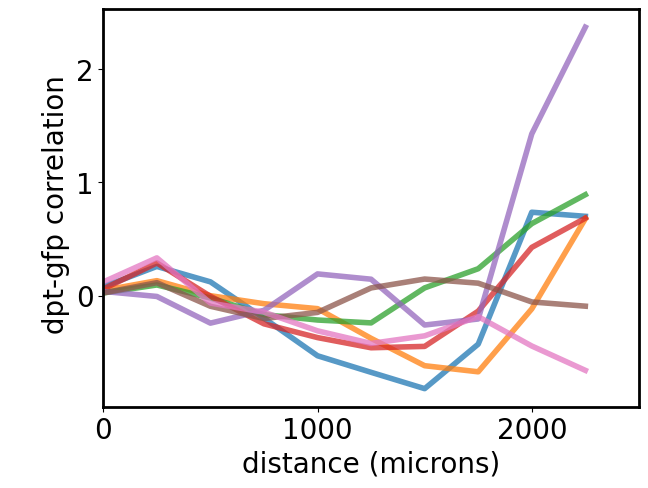

In [277]:
# spatial autocorrelation for E coli group
df = df_mod_eL3_24
thresh = np.quantile(df_eL3_ctl.dpt_gfp, q=0.95)
distance_bin_edges = np.linspace(0, 2500, 11)
plt.figure()
all_correlations = get_all_spatial_correlations(df, thresh, distance_bin_edges)
for correlations in all_correlations:
    plt.plot(distance_bin_edges[:-1], correlations, label=str(larvae), linewidth=4, alpha=0.75)

#plt.legend(loc=3)
plt.xlim([0, 2500])
#plt.ylim([-1, 1])
plt.xlabel('distance (microns)', fontsize=fontsize)
plt.ylabel('\n dpt-gfp correlation', fontsize=fontsize)
plt.xticks([0, 1000, 2000])
#plt.yticks([-1, 0, 1])
plt.minorticks_off()
ax = plt.gca()
fontweight = 'bold'
fontproperties = {'family':'sans-serif','sans-serif':['Helvetica'],'weight' : fontweight, 'size' : fontsize}
ax.xaxis.set_tick_params(labelsize=20)
ax.yaxis.set_tick_params(labelsize=20)
for tick in ax.xaxis.get_major_ticks():
    tick.label1.set_fontsize(fontsize)
for tick in ax.yaxis.get_major_ticks():
    tick.label1.set_fontsize(fontsize)
    
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=1.0)
#plt.savefig(r'/media/brandon/Data1/Brandon/fly_immune/diptericin_paper/manual_analysis/spatial_correlation_individuals.pdf')

In [71]:
sub_df = df[df.experiment_id == 0]
distance_matrix = build_distance_matrix_from_df(sub_df)
intens = sub_df.dpt_gfp.values.astype('float64')
intens = intens - thresh
intens[intens < 0] = 0
np.random.shuffle(intens)


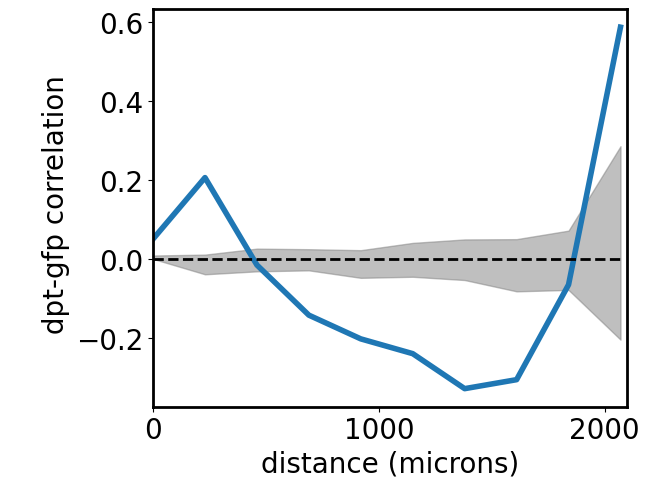

In [272]:
# spatial autocorrelations with uncertainties
df = df_mod_eL3_24
thresh = np.quantile(df_eL3_ctl.dpt_gfp, q=0.95)
distance_bin_edges = np.linspace(0, 2300, 11)
plt.figure()
all_correlations = get_all_spatial_correlations(df, thresh, distance_bin_edges)
lower, upper, _ = get_all_spatial_correlation_uncertainties(df, thresh, distance_bin_edges, num_scrambles=10)
plt.fill_between(distance_bin_edges[:-1], lower, upper, color=[0.5, 0.5, 0.5], alpha=0.5)
plt.plot(distance_bin_edges[:-1], np.nanmean(all_correlations, axis=0), linewidth=4)
plt.plot(distance_bin_edges[:-1], np.zeros(distance_bin_edges[:-1].shape), 'k--', linewidth=2)

# style
plt.xlim([0, 2100])
#plt.ylim([-1, 1])
plt.xlabel('distance (microns)', fontsize=fontsize)
plt.ylabel('\n dpt-gfp correlation', fontsize=fontsize)
plt.xticks([0, 1000, 2000])
#plt.yticks([-1, 0, 1])
plt.minorticks_off()
ax = plt.gca()
fontweight = 'bold'
fontproperties = {'family':'sans-serif','sans-serif':['Helvetica'],'weight' : fontweight, 'size' : fontsize}
ax.xaxis.set_tick_params(labelsize=20)
ax.yaxis.set_tick_params(labelsize=20)
for tick in ax.xaxis.get_major_ticks():
    tick.label1.set_fontsize(fontsize)
for tick in ax.yaxis.get_major_ticks():
    tick.label1.set_fontsize(fontsize)
    
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=1.0)



/home/brandon/anaconda3/envs/ome_zarr/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3474: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/brandon/anaconda3/envs/ome_zarr/lib/python3.9/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/brandon/anaconda3/envs/ome_zarr/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3474: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/brandon/anaconda3/envs/ome_zarr/lib/python3.9/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/brandon/anaconda3/envs/ome_zarr/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3474: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/brandon/anaconda3/envs/ome_zarr/lib/python3.9/site-pac

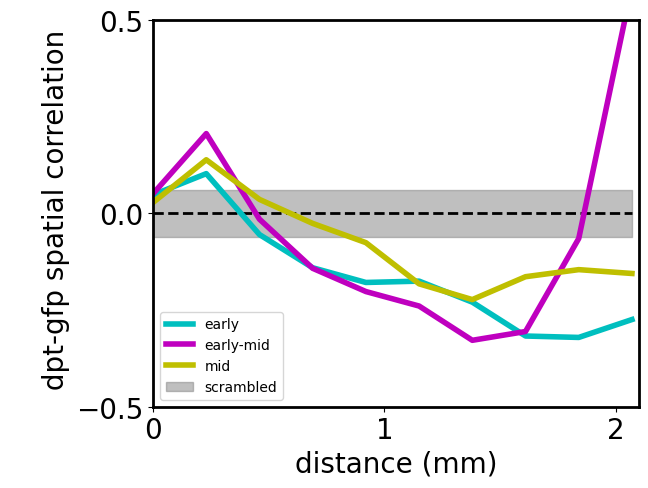

In [280]:
# spatial autocorrelations with uncertainties for all groups
thresh = np.quantile(df_eL3_ctl.dpt_gfp, q=0.95)
distance_bin_edges = np.linspace(0, 2300, 11)
plt.figure()
plt.plot(distance_bin_edges[:-1], np.zeros(distance_bin_edges[:-1].shape), 'k--', linewidth=2, label='_nolabel_')

lowers = np.zeros((3, len(distance_bin_edges) - 1))
uppers = np.zeros((3, len(distance_bin_edges) - 1))

# eL3_24
df = df_eL3_24
counter = 0
all_correlations = get_all_spatial_correlations(df, thresh, distance_bin_edges)
lowers[counter], uppers[counter], _ = get_all_spatial_correlation_uncertainties(df, thresh, distance_bin_edges, num_scrambles=10)
#plt.fill_between(distance_bin_edges[:-1], lower, upper, color=[0.5, 0.5, 0.5], alpha=0.5)
plt.plot(distance_bin_edges[:-1], np.nanmean(all_correlations, axis=0), linewidth=4, color='c', alpha=1, label='early')

# mod_eL3_24
df = df_mod_eL3_24
counter = 1
all_correlations = get_all_spatial_correlations(df, thresh, distance_bin_edges)
lowers[counter], uppers[counter], _ = get_all_spatial_correlation_uncertainties(df, thresh, distance_bin_edges, num_scrambles=10)
#plt.fill_between(distance_bin_edges[:-1], lower, upper, color=[0.5, 0.5, 0.5], alpha=0.5)
plt.plot(distance_bin_edges[:-1], np.nanmean(all_correlations, axis=0), linewidth=4, color='m', alpha=1, label='early-mid')

# mL3_24
df = df_mL3_24
counter = 2
all_correlations = get_all_spatial_correlations(df, thresh, distance_bin_edges)
lowers[counter], uppers[counter], _ = get_all_spatial_correlation_uncertainties(df, thresh, distance_bin_edges, num_scrambles=10)
#plt.fill_between(distance_bin_edges[:-1], lower, upper, color=[0.5, 0.5, 0.5], alpha=0.5)
plt.plot(distance_bin_edges[:-1], np.nanmean(all_correlations, axis=0), linewidth=4, color='y', alpha=1, label='mid')

#uncertainty
plt.fill_between(distance_bin_edges[:-1], np.nanmean(lower, axis=0), np.nanmean(upper, axis=0), color=[0.5, 0.5, 0.5], alpha=0.5, label='scrambled')

# style
plt.xlim([0, 2100])
plt.ylim([-0.5, 0.5])
plt.xlabel('distance (mm)', fontsize=fontsize)
plt.ylabel('\n dpt-gfp spatial correlation', fontsize=fontsize)
plt.xticks([0, 1000, 2000], labels=[0, 1, 2])
plt.yticks([-0.5, 0, 0.5])
plt.minorticks_off()
plt.legend(loc=3)

ax = plt.gca()
fontweight = 'bold'
fontproperties = {'family':'sans-serif','sans-serif':['Helvetica'],'weight' : fontweight, 'size' : fontsize}
ax.xaxis.set_tick_params(labelsize=20)
ax.yaxis.set_tick_params(labelsize=20)
for tick in ax.xaxis.get_major_ticks():
    tick.label1.set_fontsize(fontsize)
for tick in ax.yaxis.get_major_ticks():
    tick.label1.set_fontsize(fontsize)

plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=1.0)
plt.savefig(r'/media/brandon/Data1/Brandon/fly_immune/diptericin_paper/manual_analysis/spatial_correlations_3colors.pdf')

In [102]:
lowers[1]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [43]:
for i , val in enumerate(np.unique(df.experiment_id)):
    print(i)

0
1
2
3
4
5
6


(array([6296., 9256., 8207., 5424., 3992., 2460., 1473.,  781.,  268.,
          69.]),
 array([  16.1475419 ,  218.36996541,  420.59238892,  622.81481243,
         825.03723594, 1027.25965945, 1229.48208296, 1431.70450647,
        1633.92692998, 1836.14935348, 2038.37177699]),
 <BarContainer object of 10 artists>)

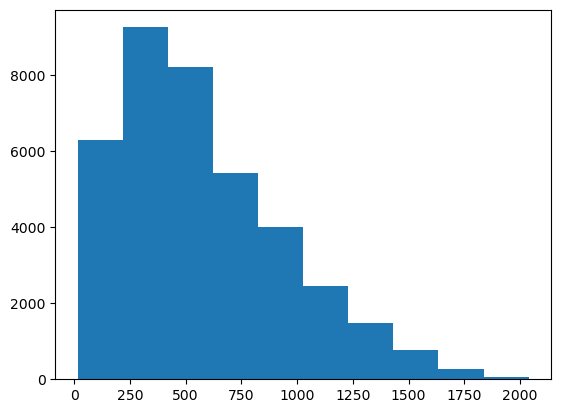

In [275]:
plt.hist(distance_matrix[distance_matrix > 0])

In [465]:
# spatial autocorrelation for mock group
df = df_eL3_ctl
distance_bin_edges = np.linspace(0, 2500, 11)
thresh = np.quantile(df_eL3_ctl.dpt_gfp, q=0.95)
plt.figure()
for larvae in np.unique(df.experiment_id):
    sub_df = df[df.experiment_id == larvae]
    distance_matrix = build_distance_matrix_from_df(sub_df)
    intens = sub_df.dpt_gfp.values.astype('float64')
    intens = intens - thresh
    intens[intens < 0] = 0
    correlations, _ = spatial_correlation(intens, distance_matrix, distance_bin_edges)
    #plt.figure()
    plt.plot(distance_bin_edges[:-1], correlations, label=str(larvae), linewidth=4, alpha=0.75)
    #plt.xlim([0, 2500])
plt.xlim([0, 2500])
plt.ylim([-1, 0.5])
plt.xlabel('distance (microns)', fontsize=fontsize)
plt.ylabel('\n dpt-gfp correlation', fontsize=fontsize)
plt.xticks([0, 1000, 2000])
plt.yticks([-1, -0.5, 0, 0.5])
#plt.legend()
plt.minorticks_off()
ax = plt.gca()
fontweight = 'bold'
fontproperties = {'family':'sans-serif','sans-serif':['Helvetica'],'weight' : fontweight, 'size' : fontsize}
ax.xaxis.set_tick_params(labelsize=20)
ax.yaxis.set_tick_params(labelsize=20)
for tick in ax.xaxis.get_major_ticks():
    tick.label1.set_fontsize(fontsize)
for tick in ax.yaxis.get_major_ticks():
    tick.label1.set_fontsize(fontsize)
    
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=1.0)
plt.savefig(r'/media/brandon/Data1/Brandon/fly_immune/diptericin_paper/manual_analysis/spatial_correlation_individuals_ctl.pdf')

/home/brandon/anaconda3/envs/ome_zarr/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3474: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/brandon/anaconda3/envs/ome_zarr/lib/python3.9/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/brandon/anaconda3/envs/ome_zarr/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3474: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/brandon/anaconda3/envs/ome_zarr/lib/python3.9/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/tmp/ipykernel_2044464/3991071894.py:30: RuntimeWarning: invalid value encountered in double_scalars
  correlations[i] = np.mean(these_intens) / total_var
/home/brandon/anaconda3/envs/ome_zarr/lib/python3.9/site-packages/numpy/core/fromnumeric.py

# Testing simple mip vs cell seg quantification

In [128]:
df = pd.read_pickle(r'/media/brandon/Data1/Brandon/fly_immune/Lightsheet_Z1/2022_02_24_uas-mcd8-gfp_r4-gal4_x_dipt_dtom2/ecoli_hs_gfp/larvae_4/manual_df.pkl')

In [129]:
df

,y,x
0,367.004632,1293.539077
1,472.257853,1305.818619
2,545.935107,1260.208890
3,602.070158,1263.717331
4,675.747412,1235.649805
...,...,...
343,3373.255858,1019.469261
344,3525.622483,1004.463458
345,4730.734403,1649.452577
346,4824.232104,1588.275069


In [130]:
green_mip = np.array(Image.open(r'/media/brandon/Data1/Brandon/fly_immune/Lightsheet_Z1/2022_02_24_uas-mcd8-gfp_r4-gal4_x_dipt_dtom2/ecoli_hs_gfp/larvae_4/mips/mip_green_0.tif'))
red_mip = np.array(Image.open(r'/media/brandon/Data1/Brandon/fly_immune/Lightsheet_Z1/2022_02_24_uas-mcd8-gfp_r4-gal4_x_dipt_dtom2/ecoli_hs_gfp/larvae_4/mips/mip_red_0.tif'))

In [131]:
df = quantify_cells(df, green_mip, red_mip, r)

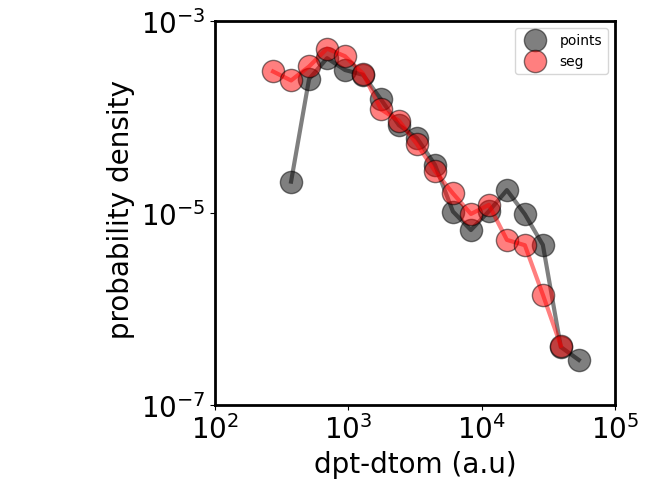

In [142]:
plt.figure()
num_bins = 20
bins = np.logspace(2.3, 5, num_bins+1)

# simple mip
counts, _bins = np.histogram(df.mem_mch, bins)
bin_widths = np.diff(bins)
bins = bins[:-1]
prob_dens = counts / np.sum(counts) / bin_widths
plt.plot(bins[prob_dens > 0], prob_dens[prob_dens > 0], 'k-', linewidth=3, label='_no_label_', alpha=0.5)
plt.plot(bins[prob_dens > 0], prob_dens[prob_dens > 0], 'ko', markersize=16, markerfacecolor='k', label='points', alpha=0.5)

# seg
counts, _bins = np.histogram(og_df.intensity_mean, bins)
bin_widths = np.diff(bins)
bins = bins[:-1]
prob_dens = counts / np.sum(counts) / bin_widths
plt.plot(bins[prob_dens > 0], prob_dens[prob_dens > 0], 'r-', linewidth=3, label='_no_label_', alpha=0.5)
plt.plot(bins[prob_dens > 0], prob_dens[prob_dens > 0], 'ko', markersize=16, markerfacecolor='r', label='seg', alpha=0.5)

plt.yscale('log')
plt.xscale('log')
plt.xlim([1e2, 1e5])
plt.xlabel('dpt-dtom (a.u)', fontsize=fontsize)
plt.ylabel('\n \n \n probability density', fontsize=fontsize)
plt.yticks([1e-7, 1e-5, 1e-3])
plt.xticks([1e2, 1e3, 1e4, 1e5])
#plt.title('raw distributions, E. coli vs mock, 24hrs')
plt.legend()
plt.minorticks_off()
ax = plt.gca()
fontweight = 'bold'
fontproperties = {'family':'sans-serif','sans-serif':['Helvetica'],'weight' : fontweight, 'size' : fontsize}
ax.xaxis.set_tick_params(labelsize=20)
ax.yaxis.set_tick_params(labelsize=20)
for tick in ax.xaxis.get_major_ticks():
    tick.label1.set_fontsize(fontsize)
for tick in ax.yaxis.get_major_ticks():
    tick.label1.set_fontsize(fontsize)
    
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=1.0)

In [134]:
og_df = pd.read_pickle(r'/media/brandon/Data1/Brandon/fly_immune/Lightsheet_Z1/2022_02_24_uas-mcd8-gfp_r4-gal4_x_dipt_dtom2/ecoli_hs_gfp/larvae_4/df.pkl')

In [140]:
og_df

,label,centroid,intensity_mean
0,75,"(956.2481560789912, 919.1425172495836)",2468.953605
1,76,"(986.9685372585096, 1398.8502299908005)",34103.805244
2,77,"(987.8418444481774, 1599.0865110028558)",23100.602217
3,81,"(998.8694088882497, 865.8868114482957)",2027.557601
4,82,"(1001.893815370623, 1793.2457177504928)",17840.501440
...,...,...,...
333,809,"(7200.742272502473, 584.3401953511375)",357.802423
334,814,"(7201.62, 961.3719047619047)",646.765238
335,816,"(7208.971252204586, 1215.068959435626)",547.215168
336,817,"(7243.874541284404, 739.4926605504587)",355.424771
